In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
# import data

housing_data = pd.read_csv("../data/houseprice.csv")

In [3]:
housing_data.shape

(1460, 81)

In [4]:
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing Values

In [6]:
vars_with_na = [col for col in housing_data.columns if housing_data[col].isnull().sum()>0]
for var in vars_with_na:
    print(var, np.round(housing_data[var].isnull().mean(),3), ' % missing values ' )

LotFrontage 0.177  % missing values 
Alley 0.938  % missing values 
MasVnrType 0.005  % missing values 
MasVnrArea 0.005  % missing values 
BsmtQual 0.025  % missing values 
BsmtCond 0.025  % missing values 
BsmtExposure 0.026  % missing values 
BsmtFinType1 0.025  % missing values 
BsmtFinType2 0.026  % missing values 
Electrical 0.001  % missing values 
FireplaceQu 0.473  % missing values 
GarageType 0.055  % missing values 
GarageYrBlt 0.055  % missing values 
GarageFinish 0.055  % missing values 
GarageQual 0.055  % missing values 
GarageCond 0.055  % missing values 
PoolQC 0.995  % missing values 
Fence 0.808  % missing values 
MiscFeature 0.963  % missing values 


In [7]:
def analyse_na_value(df, var):
    df = df.copy()

    df[var] = np.where(df[var].isnull(), 1, 0)

    df.groupby(var)['SalePrice'].mean().plot(kind='bar')
    plt.title(var)
    plt.show()



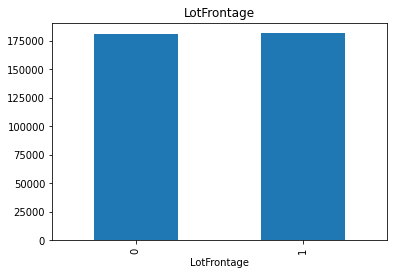

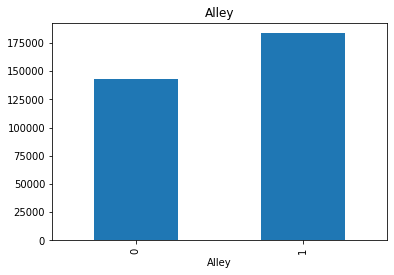

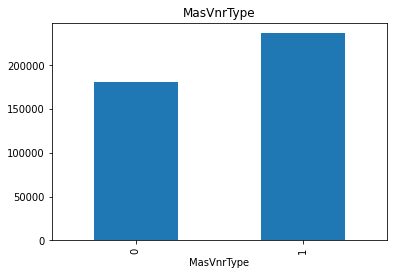

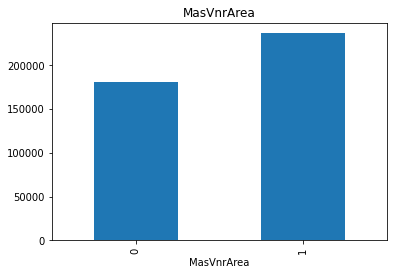

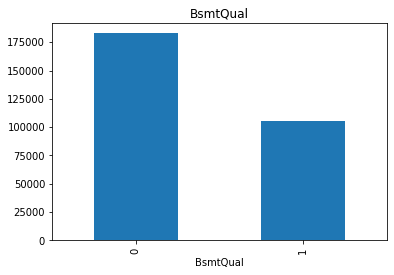

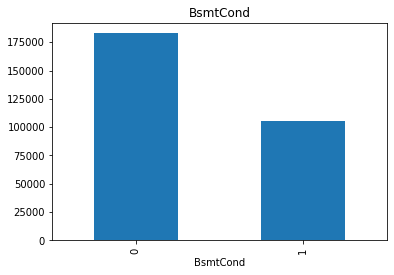

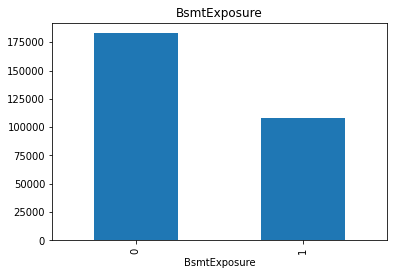

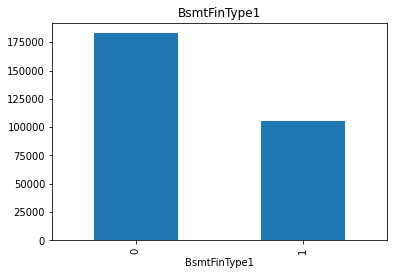

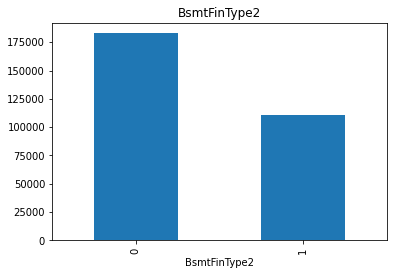

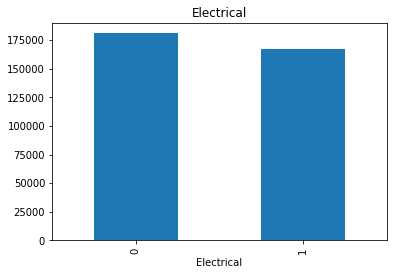

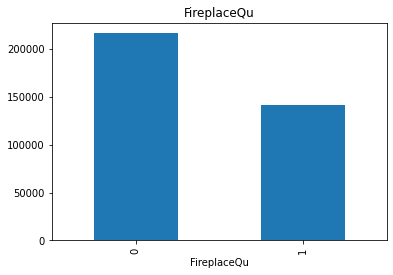

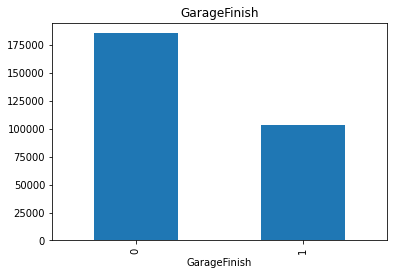

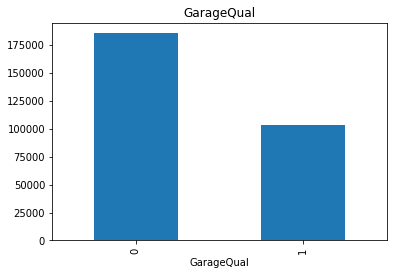

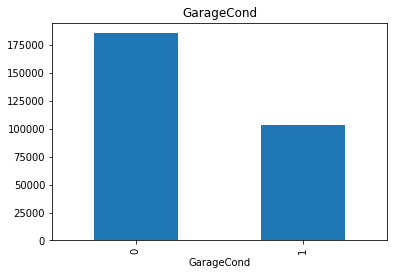

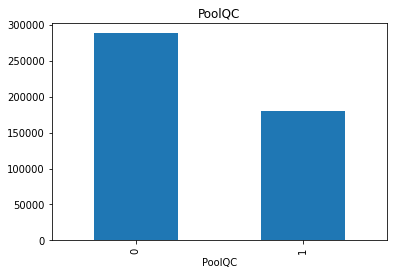

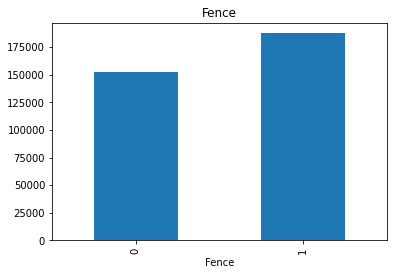

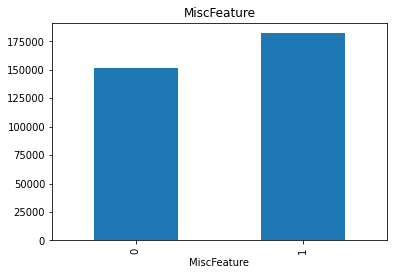

In [8]:
for var in vars_with_na:
    analyse_na_value(housing_data, var)

## Numerical Variables

1. Discrete
2. Temporal
3. Continuous

In [9]:
num_vars = [col for col in housing_data.columns if housing_data[col].dtypes != 'O']

In [10]:
print(" List of numerical variables - ", num_vars)
housing_data[num_vars].head()

 List of numerical variables -  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [11]:
temp_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

In [12]:
print(" Temporal variables - ", temp_vars)

 Temporal variables -  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [13]:
for var in temp_vars:
    print(housing_data[var].unique())
    print()

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 19

In [14]:
def analyse_date_vars(df, var):

    df = df.copy()

    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.xlabel(var)
    plt.show()

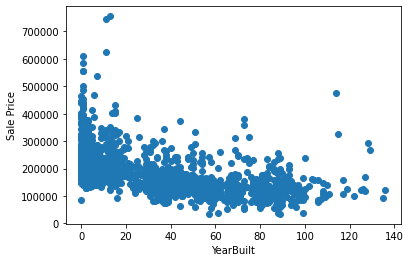

In [15]:
for var in temp_vars:
    if var != 'YrSold':
        analyse_date_vars(housing_data, var)

In [19]:
discrete_vars = [ var for var in num_vars if housing_data[var].nunique()<20 and var !='Id']

In [47]:
def analyse_discrete(df, var):

    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Sale Price')
    plt.show()

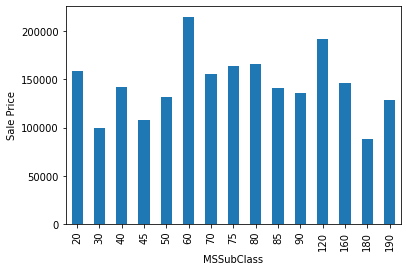

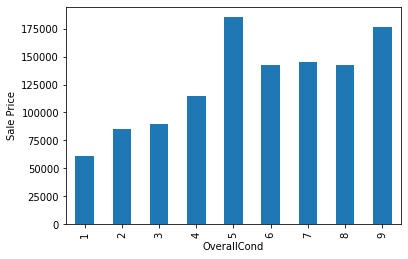

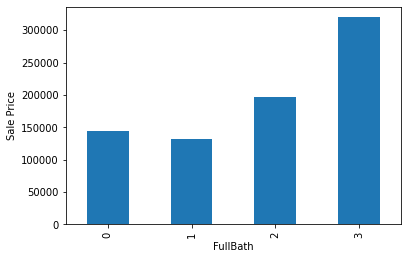

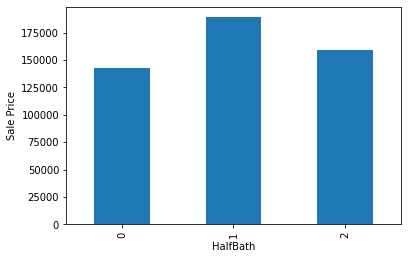

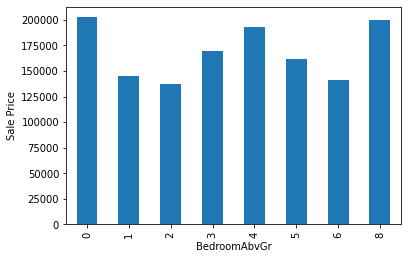

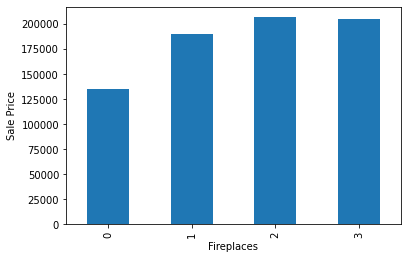

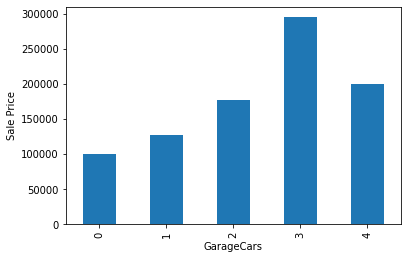

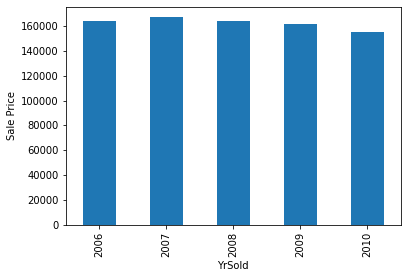

In [48]:
for var in discrete_vars:
    analyse_discrete(housing_data, var)

In [23]:
cont_vars = [col for col in num_vars if col not in temp_vars+discrete_vars+['Id']]
print(' Number of continuous variables: ', len(cont_vars))

 Number of continuous variables:  19


In [24]:
housing_data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [31]:
def analyse_continuous(df, var):

    df = df.copy()
    df[var].plot(kind='hist', bins = 25)
    plt.xlabel(var)
    plt.show()

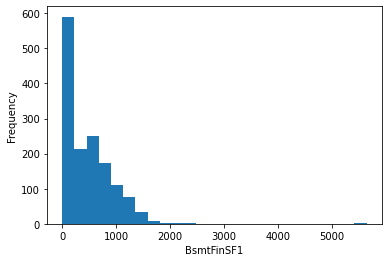

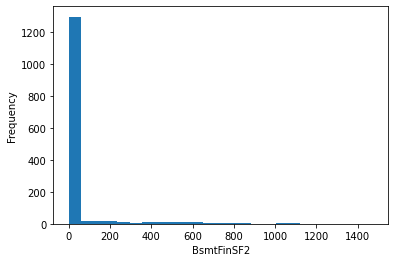

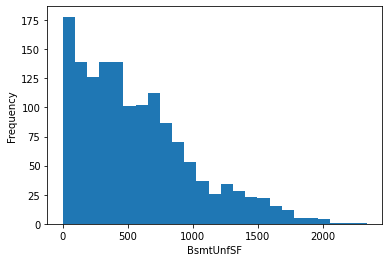

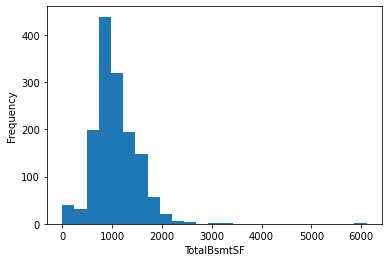

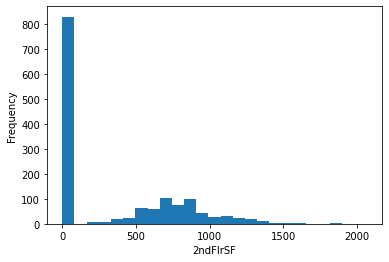

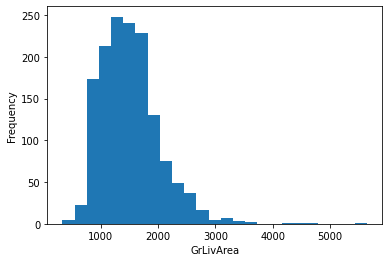

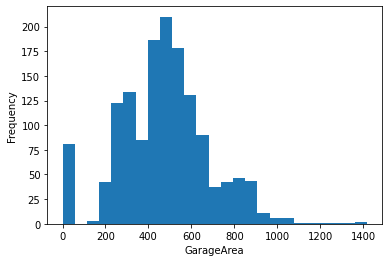

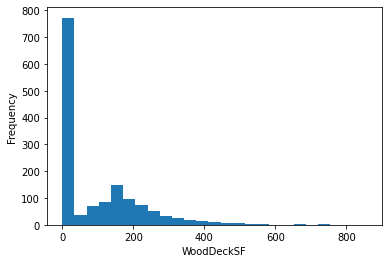

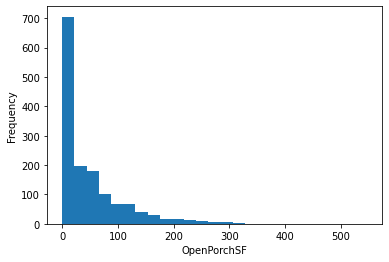

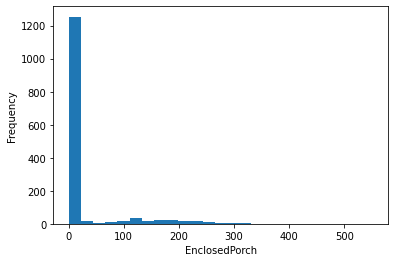

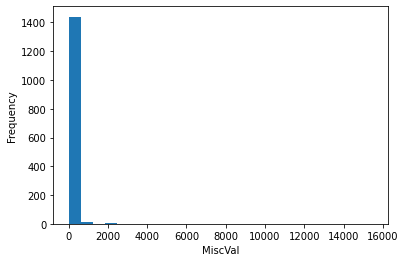

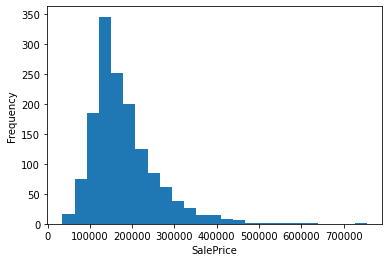

In [32]:
for var in cont_vars:
    analyse_continuous(housing_data, var)

In [35]:
def analyse_transformed_continuous(df, var):
    df = df.copy()

    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        analyse_continuous(df, var)

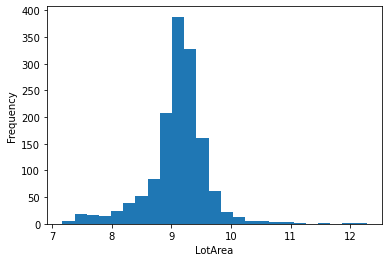

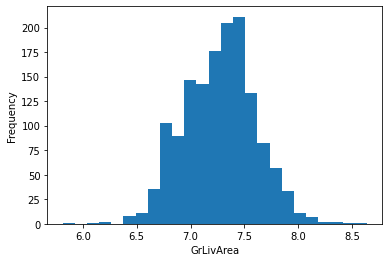

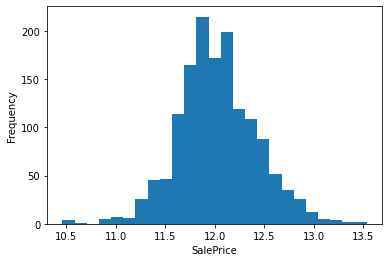

In [36]:
for var in cont_vars:
    analyse_transformed_continuous(housing_data, var)

In [37]:
def analyse_continous_relationship(df, var):

    df = df.copy()

    if 0 in df[var].unique():
        plt.scatter(df[var], df['SalePrice'])
    else:
        plt.scatter(np.log(df[var]), np.log(df['SalePrice']))
    
    plt.xlabel(var)
    plt.ylabel('Sale Price')
    plt.show()

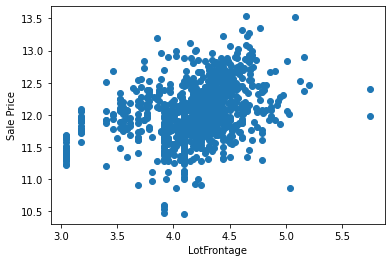

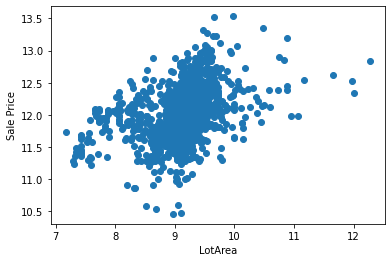

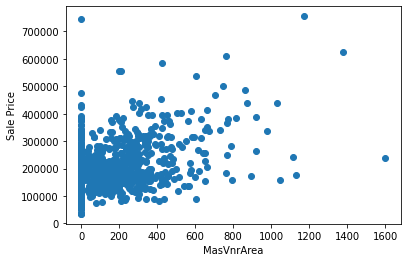

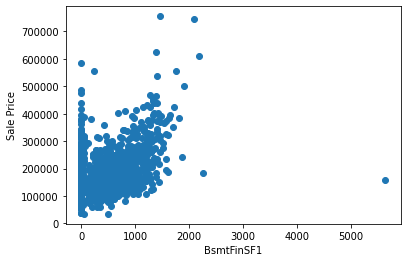

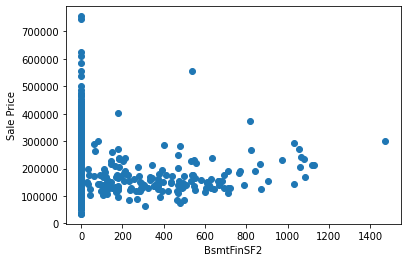

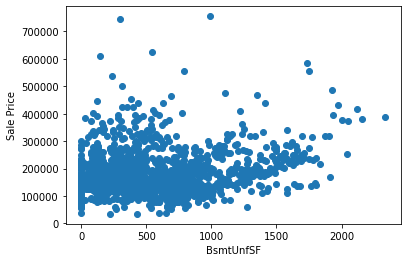

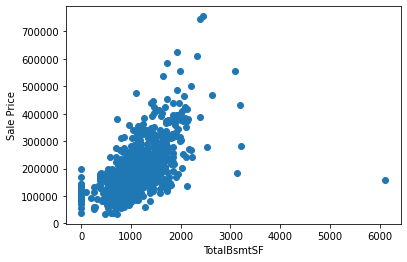

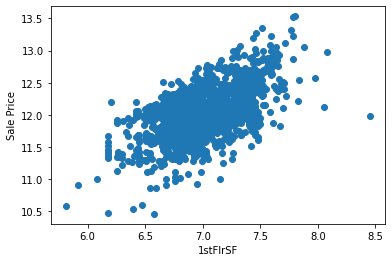

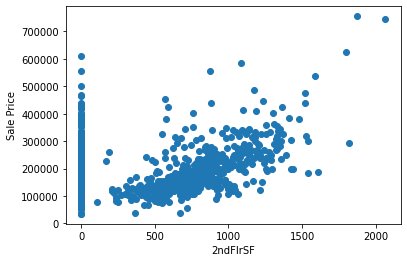

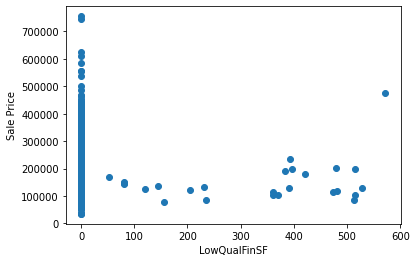

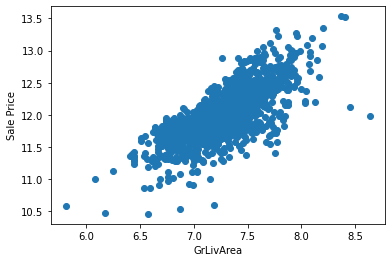

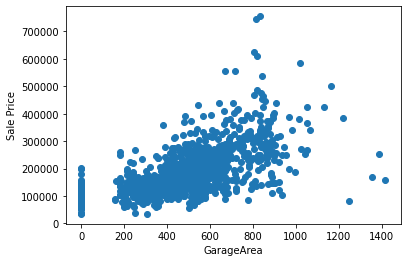

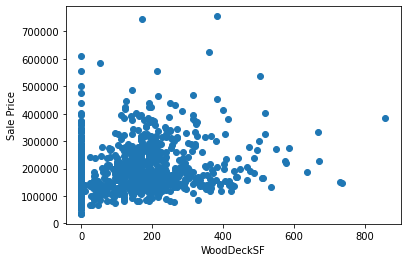

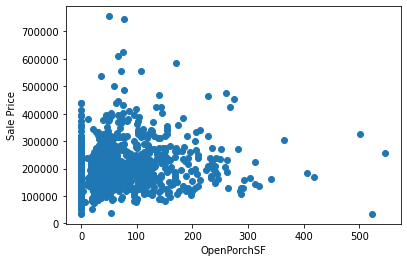

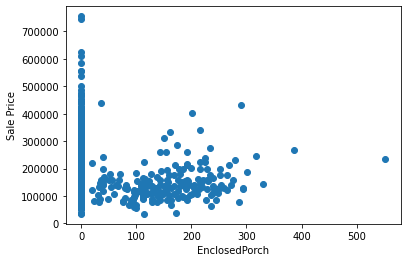

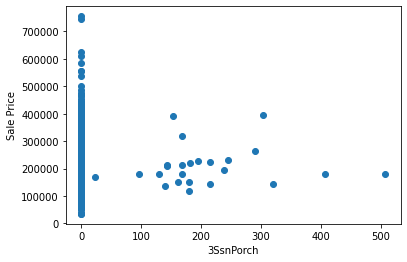

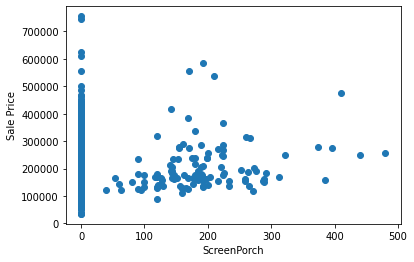

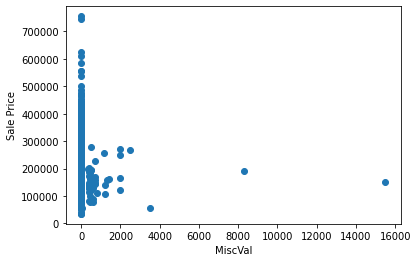

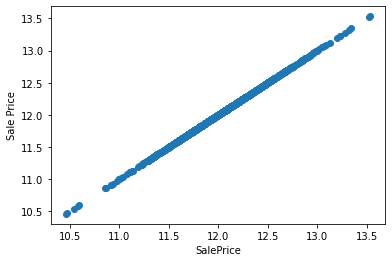

In [38]:
for var in cont_vars:
    analyse_continous_relationship(housing_data, var)

## Categorical Variables

In [39]:
cat_vars = [col for col in housing_data.columns if housing_data[col].dtype=='O']

In [43]:
print('Total categorical variables:', len(cat_vars))

Total categorical variables: 43


### Analyse Cardinality

In [44]:
for var in cat_vars:
    print(var, housing_data[var].nunique(), ' categories')

MSZoning 5  categories
Street 2  categories
Alley 2  categories
LotShape 4  categories
LandContour 4  categories
Utilities 2  categories
LotConfig 5  categories
LandSlope 3  categories
Neighborhood 25  categories
Condition1 9  categories
Condition2 8  categories
BldgType 5  categories
HouseStyle 8  categories
RoofStyle 6  categories
RoofMatl 8  categories
Exterior1st 15  categories
Exterior2nd 16  categories
MasVnrType 4  categories
ExterQual 4  categories
ExterCond 5  categories
Foundation 6  categories
BsmtQual 4  categories
BsmtCond 4  categories
BsmtExposure 4  categories
BsmtFinType1 6  categories
BsmtFinType2 6  categories
Heating 6  categories
HeatingQC 5  categories
CentralAir 2  categories
Electrical 5  categories
KitchenQual 4  categories
Functional 7  categories
FireplaceQu 5  categories
GarageType 6  categories
GarageFinish 3  categories
GarageQual 5  categories
GarageCond 5  categories
PavedDrive 3  categories
PoolQC 3  categories
Fence 4  categories
MiscFeature 4  categor

In [45]:
def analyse_rare_categories(df, var, rare_percent):
    df = df.copy()
    tmp = df[var].value_counts(normalize = True)
    return tmp[tmp<rare_percent]

In [46]:
for var in cat_vars:
    print(analyse_rare_categories(housing_data, var, 0.01))
    print()

C (all)    0.006849
Name: MSZoning, dtype: float64

Grvl    0.00411
Name: Street, dtype: float64

Series([], Name: Alley, dtype: float64)

IR3    0.006849
Name: LotShape, dtype: float64

Series([], Name: LandContour, dtype: float64)

NoSeWa    0.000685
Name: Utilities, dtype: float64

FR3    0.00274
Name: LotConfig, dtype: float64

Sev    0.008904
Name: LandSlope, dtype: float64

Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

RRAe    0.007534
PosA    0.005479
RRNn    0.003425
RRNe    0.001370
Name: Condition1, dtype: float64

Feedr     0.004110
PosN      0.001370
Artery    0.001370
RRNn      0.001370
RRAn      0.000685
PosA      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64

Series([], Name: BldgType, dtype: float64)

1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

Tar&

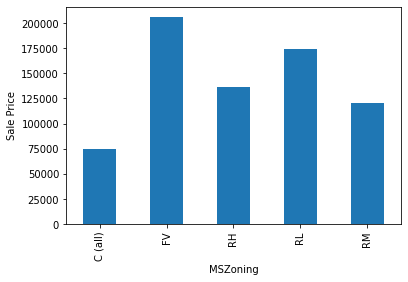

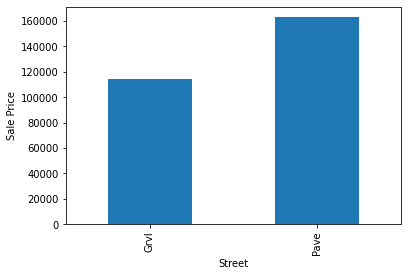

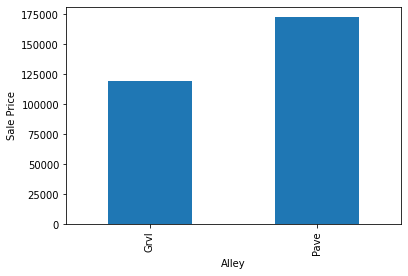

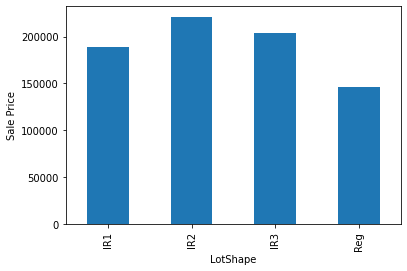

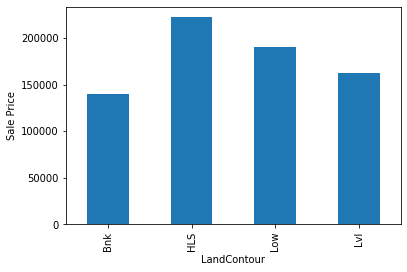

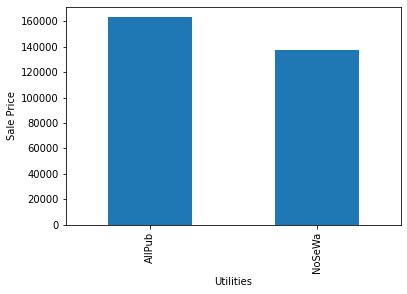

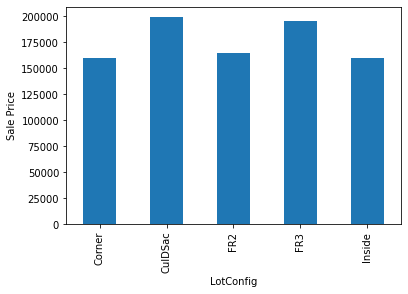

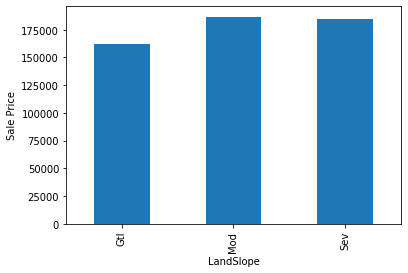

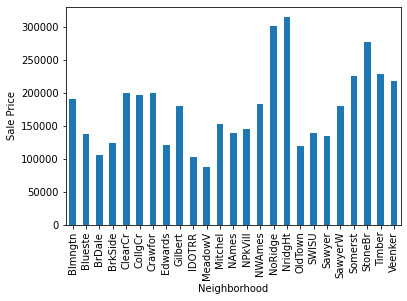

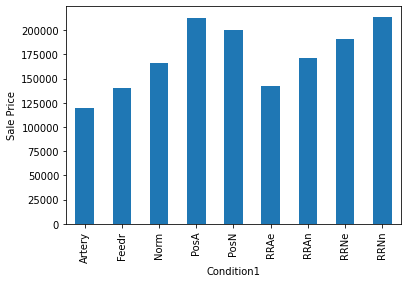

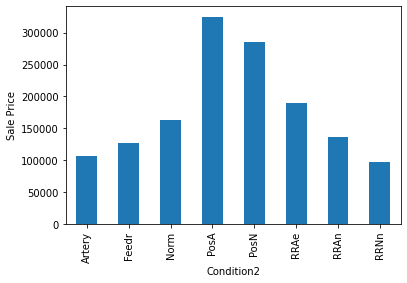

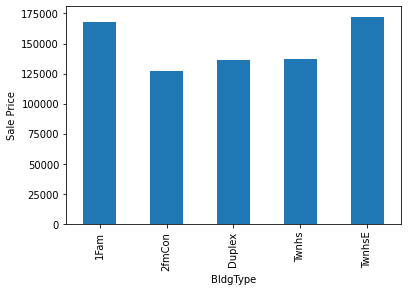

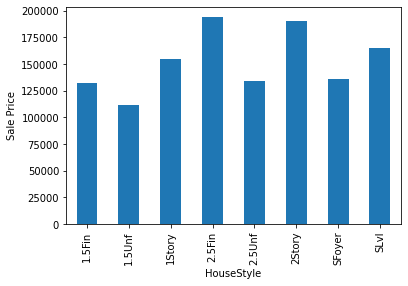

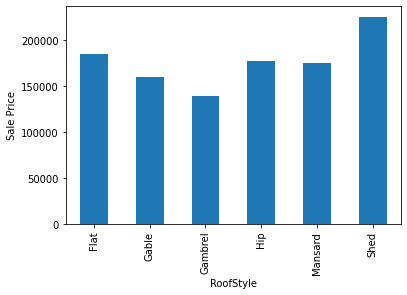

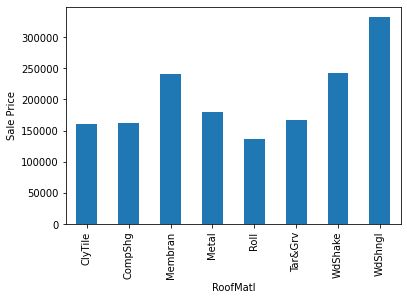

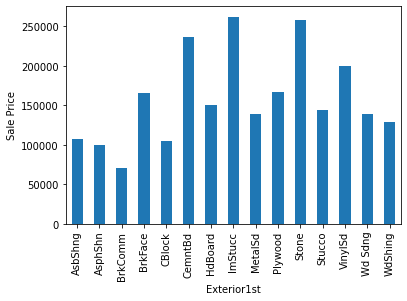

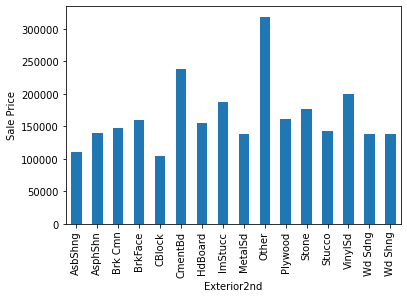

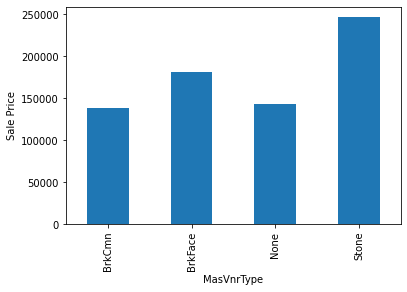

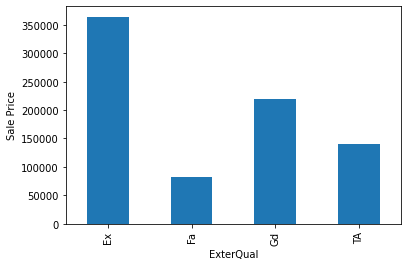

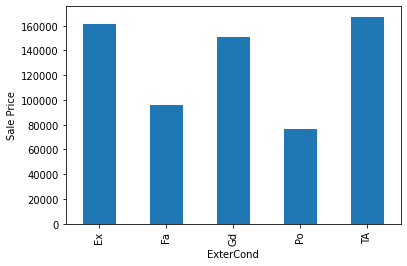

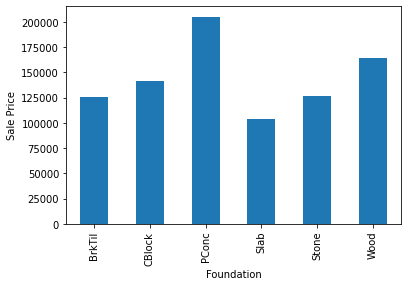

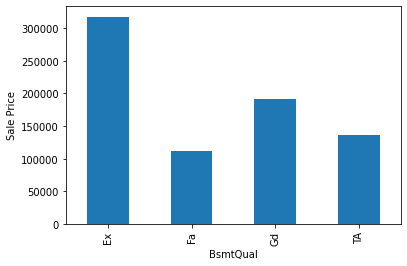

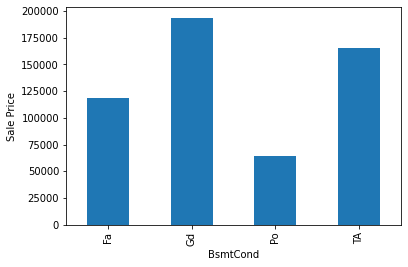

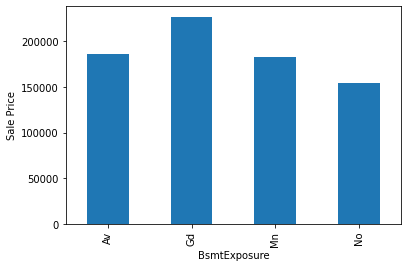

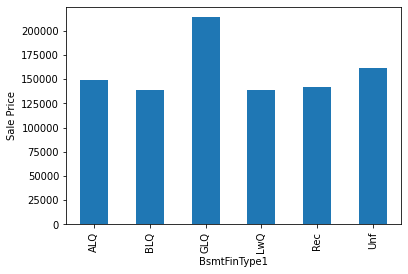

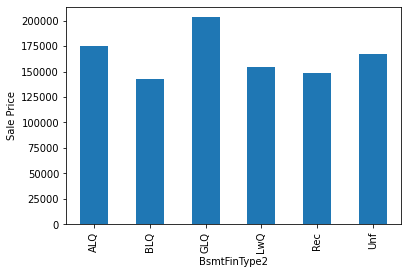

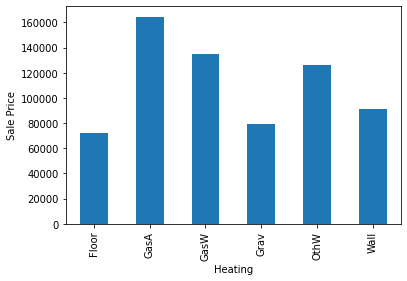

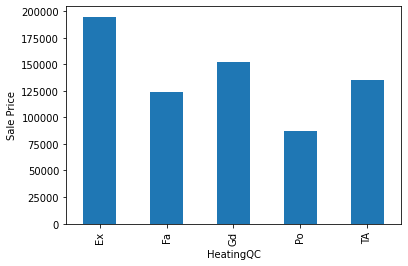

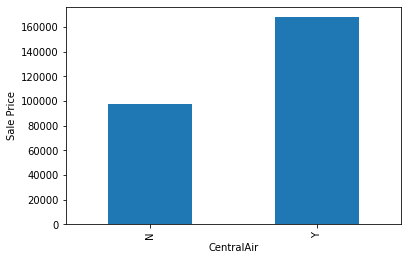

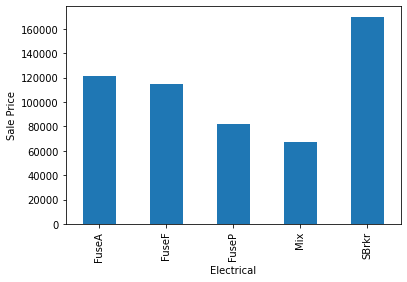

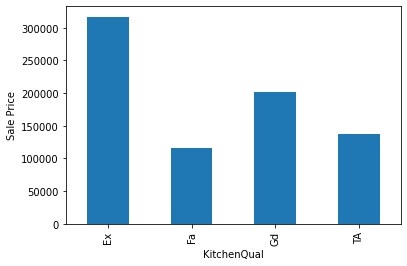

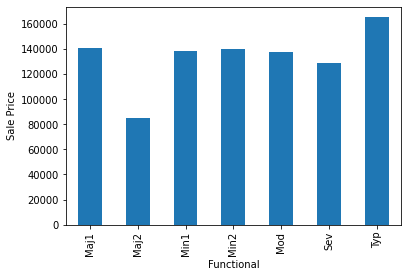

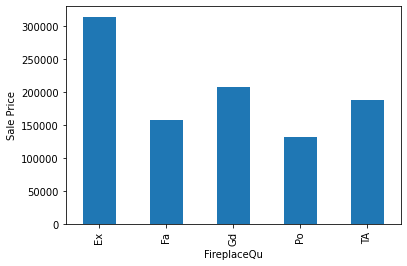

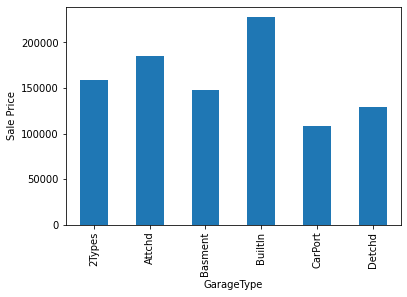

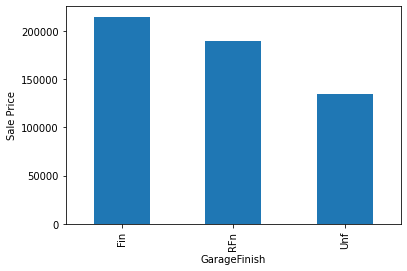

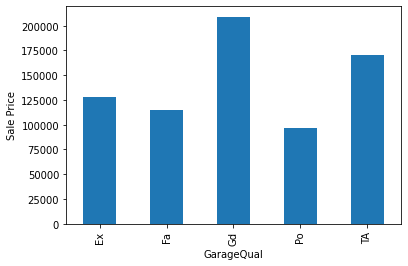

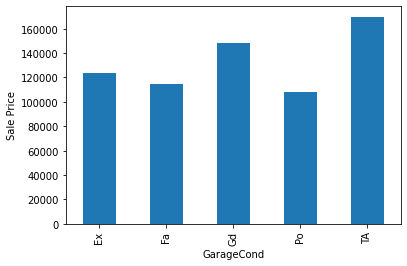

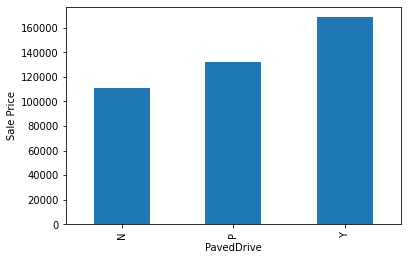

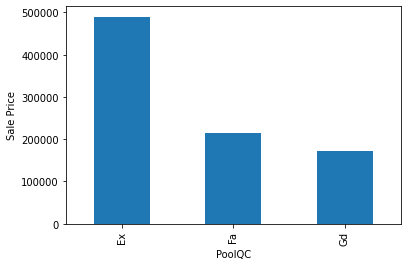

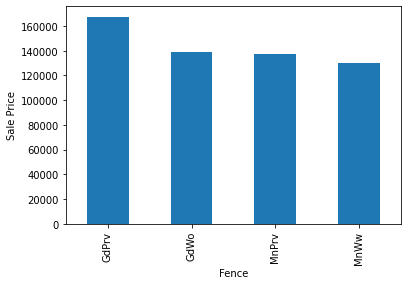

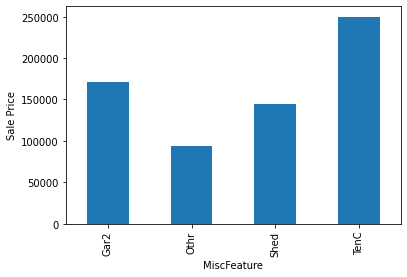

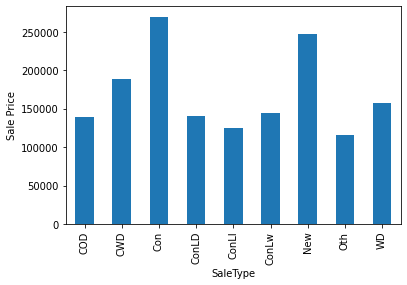

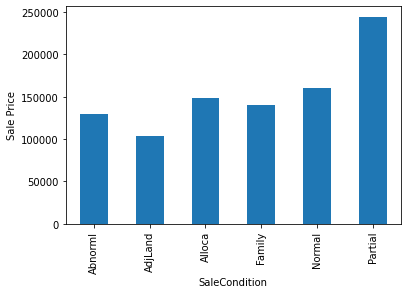

In [49]:
for var in cat_vars:
    analyse_discrete(housing_data, var)

In [ ]:
def sub_plots(df, input_vars, input_var_type='numerical', target, target_var_type='continuous'):
    pass